# EDA

In [ ]:
# 한글 깨짐 방지 폰트 설정
import matplotlib.font_manager as fm

# 폰트 경로 지정
font_path = "c:/USERS/USER/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/NANUMSQUARENEOOTF-BD.OTF"

# FontProperties 객체 생성
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 설정
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# phi 데이터 복제
phi_only = phi_striped.copy()
phi_only.head()

,HHID,PHI_N,PIDWON,PHI_Y,PHI_M,PHI_FORM,PHI_TYPE,PHI_TYPE_D,PHI_TYPE_C,PHI_TYPE_A,...,PHI_TYPE_T,PHI_TYPE_AL,PHI_TYPE_M,PHI_TYPE_O,PHI_PREMIUM_YN,PHI_PREMIUM,PHI_CLAIM_YN,PHI_BENEFIT_YN,PHI_BENEFIT,D_YEAR
0,112003011.0,101.0,11200301.0,2004.0,-9.0,3.0,"1,2,3,8",1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,120000.0,1.0,1.0,60000.0,2019
1,112003011.0,102.0,11200302.0,2004.0,-9.0,3.0,"1,2,3,8",1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,118000.0,2.0,NaN,NaN,2019
2,112010011.0,101.0,11201001.0,2015.0,3.0,2.0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,48710.0,2.0,NaN,NaN,2019
3,112010011.0,102.0,11201001.0,2000.0,7.0,1.0,"1,2",1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,3.0,62800.0,2.0,NaN,NaN,2019
4,112010011.0,103.0,11201002.0,2012.0,2.0,3.0,"1,2,3,8",1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,201717.0,2.0,NaN,NaN,2019


## 데이터 구조 확인

In [ ]:
phi_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63691 entries, 0 to 64274
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HHID            63691 non-null  float64
 1   PHI_N           63691 non-null  float64
 2   PIDWON          63691 non-null  float64
 3   PHI_Y           63691 non-null  float64
 4   PHI_M           63691 non-null  float64
 5   PHI_FORM        63691 non-null  float64
 6   PHI_TYPE        54375 non-null  object 
 7   PHI_TYPE_D      54375 non-null  float64
 8   PHI_TYPE_C      54375 non-null  float64
 9   PHI_TYPE_A      54375 non-null  float64
 10  PHI_TYPE_N      54375 non-null  float64
 11  PHI_TYPE_T      54375 non-null  float64
 12  PHI_TYPE_AL     54375 non-null  float64
 13  PHI_TYPE_M      54375 non-null  float64
 14  PHI_TYPE_O      54375 non-null  float64
 15  PHI_PREMIUM_YN  63691 non-null  float64
 16  PHI_PREMIUM     63691 non-null  float64
 17  PHI_CLAIM_YN    63691 non-null  floa

In [ ]:
# 결측치 확인
phi_only.isna().sum()

HHID                  0
PHI_N                 0
PIDWON                0
PHI_Y                 0
PHI_M                 0
PHI_FORM              0
PHI_TYPE           9316
PHI_TYPE_D         9316
PHI_TYPE_C         9316
PHI_TYPE_A         9316
PHI_TYPE_N         9316
PHI_TYPE_T         9316
PHI_TYPE_AL        9316
PHI_TYPE_M         9316
PHI_TYPE_O         9316
PHI_PREMIUM_YN        0
PHI_PREMIUM           0
PHI_CLAIM_YN          0
PHI_BENEFIT_YN    58631
PHI_BENEFIT       58757
D_YEAR                0
dtype: int64

In [ ]:
# 연도별 행 개수(독립가입 건수)
phi_only["D_YEAR"].value_counts()

D_YEAR
2019    21339
2021    21207
2020    21145
Name: count, dtype: int64

## 변수별 COUNT

In [ ]:
# 가구 수: 5313 가구
phi_only["HHID"].nunique()

5313

In [ ]:
# 가구원 수 : 11867 명
phi_only["PIDWON"].nunique()

11867

### PHI_N : 보험 종류

In [ ]:
# 보험 종류 수: 109 개
phi_only["PHI_N"].nunique()

109

In [ ]:
# 가입자 최다 보유 보험
phi_n = phi_only["PHI_N"].value_counts().to_frame("count").sort_values(by="count", ascending=False)
phi_n_top10 = phi_n.head(10)
phi_n_top10

,count
PHI_N,
101.0,11783
102.0,9898
103.0,7402
104.0,5570
201.0,3954
105.0,3745
106.0,2689
202.0,2324
107.0,1838


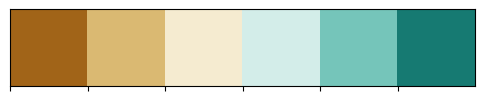

In [ ]:
# 시각화 팔레트 설정
palette = sns.color_palette("BrBG")
sns.palplot(palette)
sns.set_palette("BrBG")

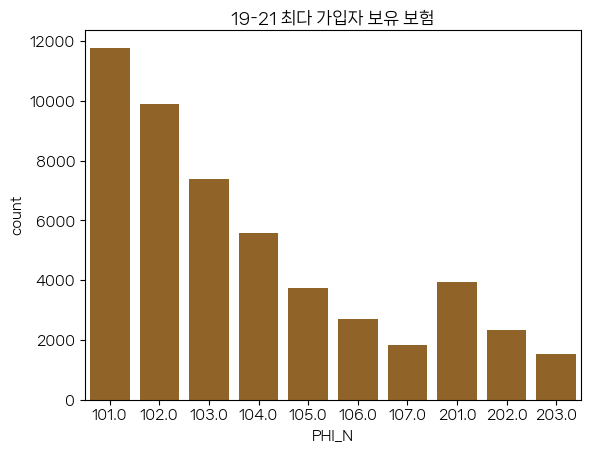

In [ ]:
# 시각화
sns.barplot(
    data=phi_n_top10,
    x="PHI_N",
    y="count"
)
plt.title("19-21 최다 가입자 보유 보험")
plt.show()

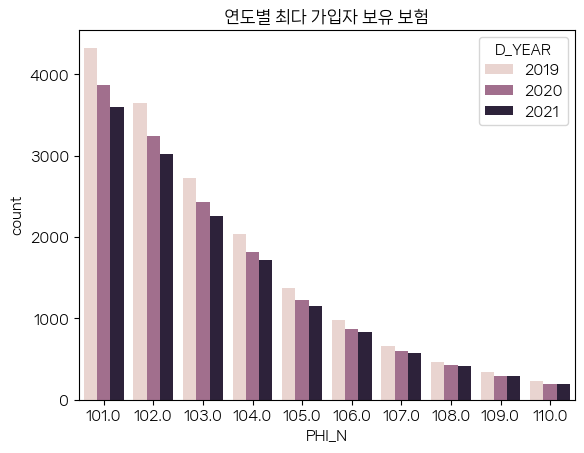

In [ ]:
# 연도별 보험 가입 현황
phi_n_year = phi_only.groupby(["D_YEAR","PHI_N"])[["PHI_N"]].size().reset_index(name="count")
phi_n_year_top10 = phi_n_year.groupby("D_YEAR").head(10)

# 시각화
sns.barplot(
    data = phi_n_year_top10,
    x = "PHI_N",
    y = "count",
    hue = "D_YEAR"
)
plt.title("연도별 최다 가입자 보유 보험")
plt.show()

### PHI_Y : 가입년도

In [ ]:
# 가입 년도
phi_only["PHI_Y"].value_counts()


PHI_Y
 2019.0    6043
 2018.0    4536
 2009.0    4531
 2014.0    4055
-9.0       3863
 2015.0    3833
 2017.0    3475
 2013.0    3434
 2016.0    3401
 2012.0    3352
 2010.0    2609
 2011.0    2542
 2008.0    2247
 2005.0    1811
 2004.0    1790
 2020.0    1735
 2007.0    1701
 2006.0    1575
 2003.0    1233
 2000.0    1157
 2001.0    1046
 2002.0     841
 1999.0     779
 2021.0     501
 1998.0     498
 1995.0     296
 1997.0     239
 1996.0     158
 1994.0     130
 1993.0      77
 1990.0      74
 1992.0      43
 1989.0      23
 1988.0      20
 1991.0      15
 1980.0       8
 1987.0       5
 1982.0       3
 1973.0       3
 1985.0       3
 1984.0       3
 1910.0       3
Name: count, dtype: int64

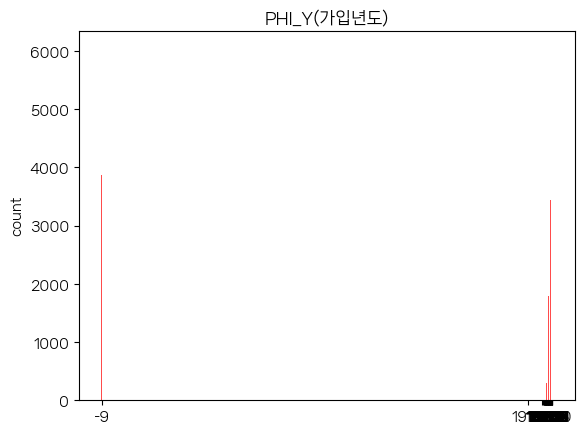

In [ ]:
phi_y = phi_only["PHI_Y"].value_counts().to_frame("count")

# bar plot
plt.bar(phi_y.index, phi_y["count"], align="center", alpha=0.7, color="red")
plt.xticks(sorted(phi_y.index))
plt.ylabel("count")
plt.title("PHI_Y(가입년도)")
plt.show()

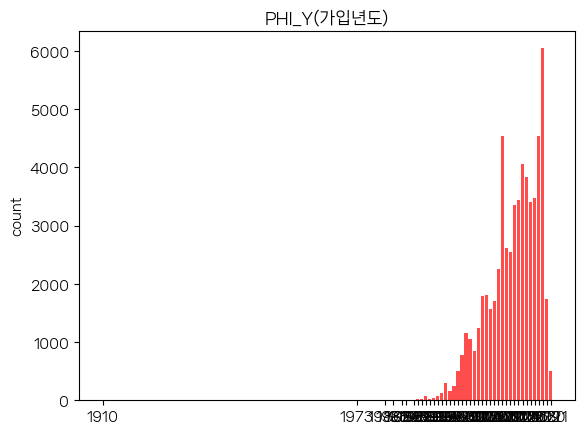

In [ ]:
# -9 제외하고 재 시각화

# 데이터 복제
phi_y_nan = phi_only.copy()
# phi_y -9값 nan값으로 대체
phi_y_nan.loc[phi_y_nan["PHI_Y"]==-9,"PHI_Y"]=np.nan

# 시각화
phi_y = phi_y_nan["PHI_Y"].value_counts().to_frame("count")

# bar plot
plt.bar(phi_y.index, phi_y["count"], align="center", alpha=0.7, color="red")
plt.xticks(sorted(phi_y.index))
plt.ylabel("count")
plt.title("PHI_Y(가입년도)")
plt.show()

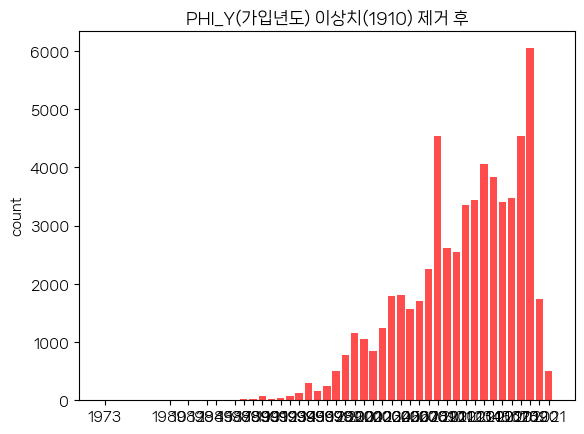

In [ ]:
# 이상치(1910) 제거 후 시각화
phi_y = phi_y_nan["PHI_Y"].value_counts().to_frame("count")
phi_y = phi_y[phi_y.index != 1910]
# bar plot
plt.bar(phi_y.index, phi_y["count"], align="center", alpha=0.7, color="red")
plt.xticks(sorted(phi_y.index))
plt.ylabel("count")
plt.title("PHI_Y(가입년도) 이상치(1910) 제거 후")
plt.show()

### PHI_M: 가입 월

In [ ]:
# 가입 월
phi_only["PHI_M"].value_counts()

PHI_M
-9.0     19413
 3.0      5670
 4.0      4055
 7.0      3678
 5.0      3640
 2.0      3607
 12.0     3559
 1.0      3483
 6.0      3470
 10.0     3345
 9.0      3270
 8.0      3254
 11.0     3247
Name: count, dtype: int64

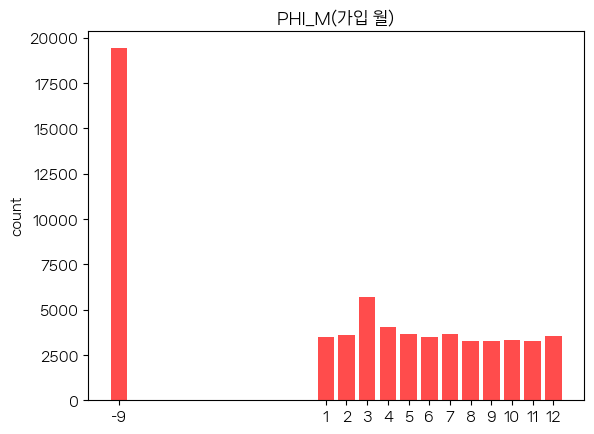

In [ ]:
phi_m = phi_only["PHI_M"].value_counts().to_frame("count")
# bar plot
plt.bar(phi_m.index, phi_m["count"], align="center", alpha=0.7, color="red")
plt.xticks(sorted(phi_m.index))
plt.ylabel("count")
plt.title("PHI_M(가입 월)")
plt.show()

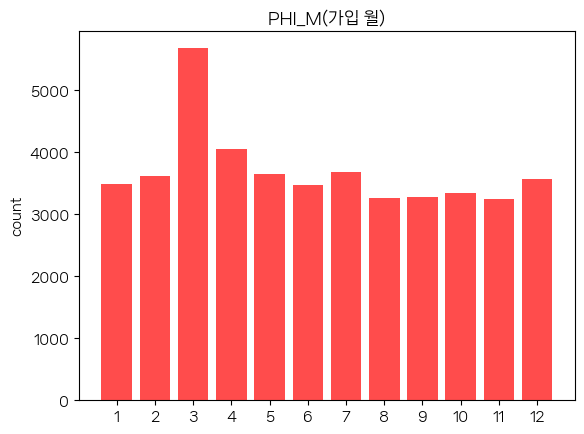

In [ ]:
# -9 제외하고 재 시각화
# 데이터 복제
phi_M_nan = phi_only.copy()
# phi_y -9값 nan값으로 대체
phi_M_nan.loc[phi_M_nan["PHI_M"]==-9,"PHI_M"]=np.nan

phi_m = phi_M_nan["PHI_M"].value_counts().to_frame("count")
# bar plot
plt.bar(phi_m.index, phi_m["count"], align="center", alpha=0.7, color="red")
plt.xticks(sorted(phi_m.index))
plt.ylabel("count")
plt.title("PHI_M(가입 월)")
plt.show()


### PHI_FORM: 보장 형태
-  (1: 정액형, 2: 실손형, 3: 혼합형)

In [ ]:
phi_only["PHI_FORM"].value_counts()

PHI_FORM
 1.0    38965
 3.0    15410
 2.0     8413
-9.0      903
Name: count, dtype: int64

### PHI_TYPE: 보장 유형

In [ ]:
phi_only["PHI_TYPE"].value_counts()

PHI_TYPE
1,2,3        13868
2             9869
1             7487
1,3           5276
1,2           3862
             ...  
3,5,8            1
2,4,6            1
1,3,6,8          1
1,2,3,4,8        1
5,8              1
Name: count, Length: 98, dtype: int64

In [ ]:
# 년도 별 유형 count
phi_only.groupby(["D_YEAR","PHI_TYPE"])[["PHI_TYPE"]].count()

PHI_TYPE
D_YEAR PHI_TYPE          
2019   -9             889
       1             2444
       1,2           1175
       1,2,3         4384
       1,2,3,4         37
...                   ...
2021   6,7              3
       7              238
       7,4              3
       7,8              7
       8               86

[238 rows x 1 columns]

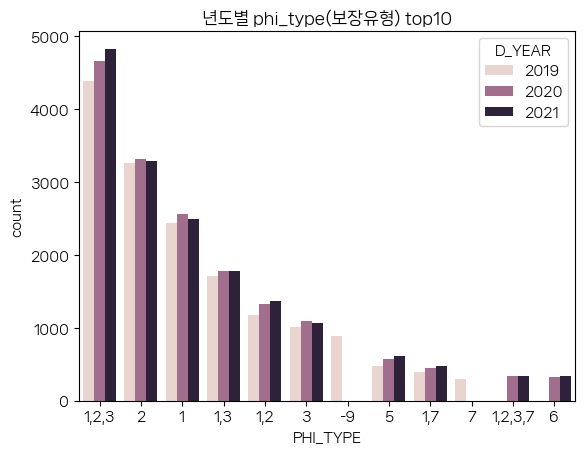

In [ ]:
# 년도 별 top 10 뽑아보기
phi_type_year = phi_only.groupby(["D_YEAR","PHI_TYPE"]).size().reset_index(name="count")
phi_type_year_sort = phi_type_year.sort_values(by=["D_YEAR","count"], ascending=[True, False]).groupby("D_YEAR").head(10)

# bar chart
import seaborn as sns

sns.barplot(
    data = phi_type_year_sort,
    x = "PHI_TYPE",
    y = "count",
    hue="D_YEAR"
)
plt.title("년도별 phi_type(보장유형) top10")
plt.show()

### PHI_PREMIUM_YN : 보험료 납부 여부

In [ ]:
phi_only["PHI_PREMIUM_YN"].value_counts()

PHI_PREMIUM_YN
 1.0    56864
 3.0     5847
-9.0      801
 2.0      179
Name: count, dtype: int64

In [ ]:
# 연도별 보험료 납부 여부
phi_only.groupby(["D_YEAR","PHI_PREMIUM_YN"])[["PHI_PREMIUM_YN"]].count()

PHI_PREMIUM_YN
D_YEAR PHI_PREMIUM_YN                
2019   -9.0                       471
        1.0                     18830
        2.0                        61
        3.0                      1977
2020   -9.0                       208
        1.0                     18968
        2.0                        49
        3.0                      1920
2021   -9.0                       122
        1.0                     19066
        2.0                        69
        3.0                      1950

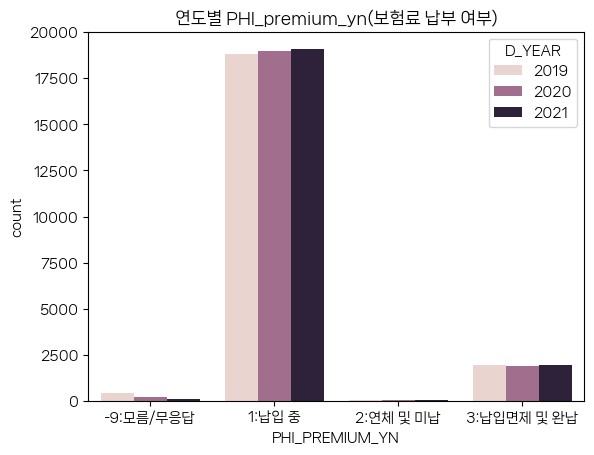

In [ ]:
premium_yn_year = phi_only.groupby(["D_YEAR","PHI_PREMIUM_YN"])[["PHI_PREMIUM_YN"]].size().reset_index(name="count")

# bar plot
sns.barplot(
    data=premium_yn_year,
    x = "PHI_PREMIUM_YN",
    y = "count",
    hue = "D_YEAR"
)
plt.xticks([0,1,2,3], ["-9:모름/무응답","1:납입 중","2:연체 및 미납","3:납입면제 및 완납"])
plt.title("연도별 PHI_premium_yn(보험료 납부 여부)")
plt.show()

### PHI_PREMIUM: 월 보험료

In [ ]:
phi_only.groupby("D_YEAR")["PHI_PREMIUM"].mean()

D_YEAR
2019    58335.873987
2020    59158.263467
2021    59397.325647
Name: PHI_PREMIUM, dtype: float64

In [ ]:
# -9 응답 값 개수 확인 : 3181 개
phi_only.loc[phi_only["PHI_PREMIUM"]==-9, "PHI_PREMIUM"].count()

3181

In [ ]:
# -9 결측값 처리 후 재 계산
# 데이터 복제
premium_nan = phi_only.copy()
# phi_y -9값 nan값으로 대체
premium_nan.loc[premium_nan["PHI_PREMIUM"]==-9,"PHI_PREMIUM"]=np.nan

premium_nan.groupby("D_YEAR")[["PHI_PREMIUM"]].mean()

,PHI_PREMIUM
D_YEAR,
2019,62304.376677
2020,62027.583825
2021,61859.582625


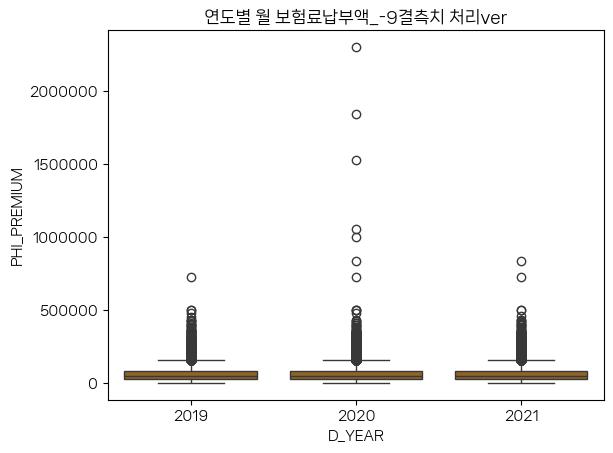

In [ ]:
sns.boxplot(
    data = premium_nan,
    x = "D_YEAR",
    y = "PHI_PREMIUM",
)
# y축 tick label을 실수 형식으로 변경
plt.ticklabel_format(style='plain', axis='y')

plt.title("연도별 월 보험료납부액_-9결측치 처리ver")
plt.show()

In [ ]:
# 이상치 제거 - -9를 결측치로 처리 한 뒤
phi_premium_drop = premium_nan.loc[~premium_nan["PHI_PREMIUM"].isin(premium_nan["PHI_PREMIUM"].nlargest(5).unique())]

phi_premium_drop.groupby("D_YEAR")["PHI_PREMIUM"].mean()

D_YEAR
2019    62304.376677
2020    61660.119383
2021    61859.582625
Name: PHI_PREMIUM, dtype: float64

In [ ]:
# 제거된 이상치 확인
premium_nan.loc[premium_nan["PHI_PREMIUM"].isin(premium_nan["PHI_PREMIUM"].nlargest(5).unique())]["PHI_PREMIUM"]

25471    2300000.0
25547    1522830.0
36013    1841626.0
36421    1000000.0
36556    1054500.0
Name: PHI_PREMIUM, dtype: float64

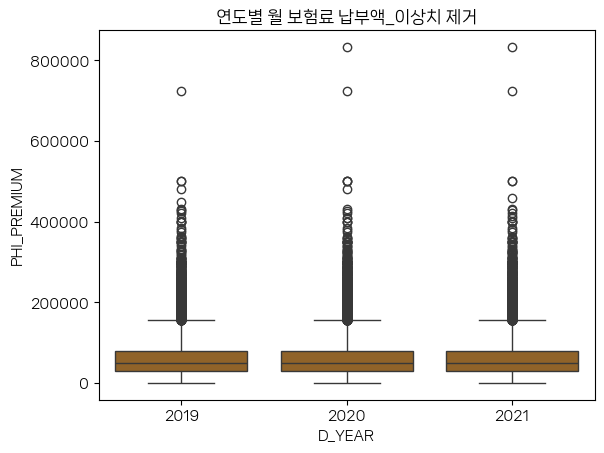

In [ ]:
# boxplot
sns.boxplot(
    data = phi_premium_drop,
    x = "D_YEAR",
    y = "PHI_PREMIUM"
)
plt.title("연도별 월 보험료 납부액_이상치 제거")
plt.show()

### PHI_CLAIM_YN: 보험금청구 여부

In [ ]:
phi_only["PHI_CLAIM_YN"].value_counts()

PHI_CLAIM_YN
 2.0    58169
 1.0     5060
-9.0      462
Name: count, dtype: int64

In [ ]:
# 연도별 청구건수
phi_only.groupby(["D_YEAR","PHI_CLAIM_YN"])[["PHI_CLAIM_YN"]].count()

PHI_CLAIM_YN
D_YEAR PHI_CLAIM_YN              
2019   -9.0                   350
        1.0                  1255
        2.0                 19734
2020   -9.0                    86
        1.0                  1880
        2.0                 19179
2021   -9.0                    26
        1.0                  1925
        2.0                 19256

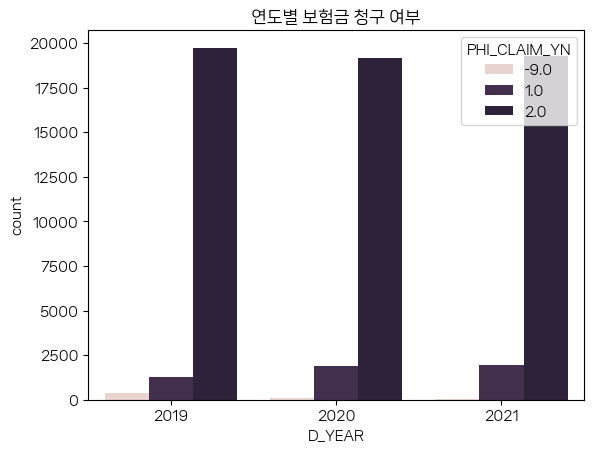

In [ ]:
claim_yn = phi_only.groupby(["D_YEAR","PHI_CLAIM_YN"])[["PHI_CLAIM_YN"]].size().reset_index(name="count")

# barplot
sns.barplot(
    data = claim_yn,
    x = "D_YEAR",
    y = "count",
    hue = "PHI_CLAIM_YN"
)
plt.title("연도별 보험금 청구 여부")
plt.show()

### PHI_BENEFIT_YN: 보험금 수령 여부

In [ ]:
phi_only["PHI_BENEFIT_YN"].value_counts()

PHI_BENEFIT_YN
1.0    4934
2.0     107
3.0      19
Name: count, dtype: int64

In [ ]:
# 연도별 보험금 수령 여부
phi_only.groupby(["D_YEAR","PHI_BENEFIT_YN"])[["PHI_BENEFIT_YN"]].count()

PHI_BENEFIT_YN
D_YEAR PHI_BENEFIT_YN                
2019   1.0                       1182
       2.0                         63
       3.0                         10
2020   1.0                       1852
       2.0                         22
       3.0                          6
2021   1.0                       1900
       2.0                         22
       3.0                          3

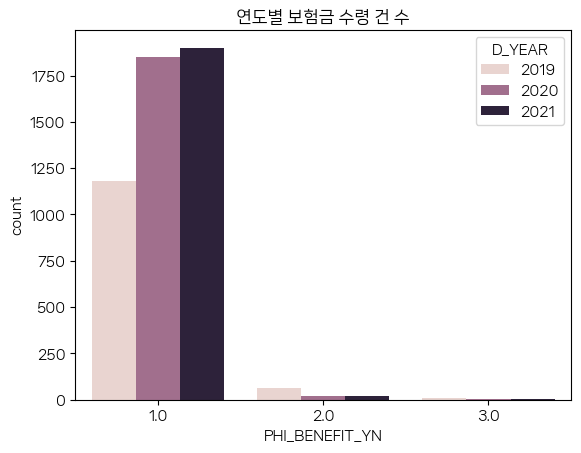

In [ ]:
benefit_yn = phi_only.groupby(["D_YEAR","PHI_BENEFIT_YN"])[["PHI_BENEFIT_YN"]].size().reset_index(name="count")

# bar plot
sns.barplot(
    data = benefit_yn,
    x = "PHI_BENEFIT_YN",
    y = "count",
    hue = "D_YEAR"
)
plt.title("연도별 보험금 수령 건 수")
plt.show()

### PHI_BENEFIT: 보험금 수령액

In [ ]:
# -9 결측치로 처리
benefit_nan = phi_only.copy()

benefit_nan.loc[benefit_nan["PHI_BENEFIT"]==-9, "PHI_BENEFIT"] = np.nan

In [ ]:
# 실제 수령 건수
benefit_nan["PHI_BENEFIT"].notna().sum()

4921

In [ ]:
# 자연지수 형식 없이 표현
pd.set_option('display.float_format', lambda x: '%.10f' % x)

# 연도별 평균 수령액
benefit_nan.groupby("D_YEAR")[["PHI_BENEFIT"]].mean()

,PHI_BENEFIT
D_YEAR,
2019,1418190.8656971771
2020,1353604.0718142549
2021,1468984.3057894737


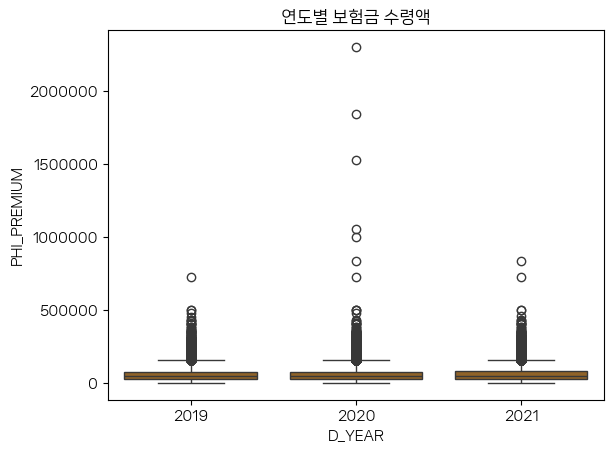

In [ ]:
sns.boxplot(
    data = benefit_nan,
    x = "D_YEAR",
    y = "PHI_PREMIUM"
)
# y축 tick label을 실수 형식으로 변경
plt.ticklabel_format(style='plain', axis='y')

plt.title("연도별 보험금 수령액")
plt.show()

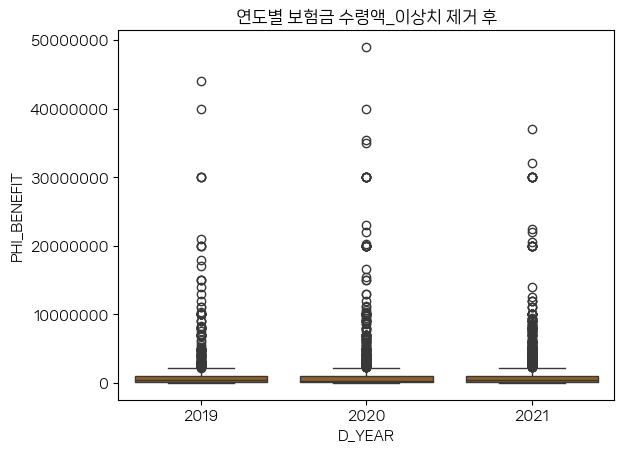

In [ ]:
# 이상치 제거
phi_benefit_drop = benefit_nan.loc[~benefit_nan["PHI_BENEFIT"].isin(benefit_nan["PHI_BENEFIT"].nlargest(5).unique())]

sns.boxplot(
    data = phi_benefit_drop,
    x = "D_YEAR",
    y = "PHI_BENEFIT"
)
# y축 tick label을 실수 형식으로 변경
plt.ticklabel_format(style='plain', axis='y')

plt.title("연도별 보험금 수령액_이상치 제거 후")
plt.show()

In [ ]:
# 이상치 제거 후 평균 값 확인
phi_benefit_drop.groupby("D_YEAR")[["PHI_BENEFIT"]].mean()

,PHI_BENEFIT
D_YEAR,
2019,1318650.4901456726
2020,1327322.9286871962
2021,1304683.3057022176


In [ ]:
# 제거된 이상치 확인
benefit_nan.loc[benefit_nan["PHI_BENEFIT"].isin(benefit_nan["PHI_BENEFIT"].nlargest(5).unique())][["PHI_BENEFIT"]]

,PHI_BENEFIT
15490,64000000.0000000000
18626,55000000.0000000000
31741,50000000.0000000000
47054,50000000.0000000000
48301,60000000.0000000000
53069,60000000.0000000000
53121,50000000.0000000000
61473,50000000.0000000000
64195,50000000.0000000000


## 보험금 청구 대비 보험금 수령 비율

In [ ]:
# 보험금 수령 여부=1 / 보험금 청구 여부=1
claim_1 = phi_only[phi_only["PHI_CLAIM_YN"]==1]["PHI_CLAIM_YN"].count()
get_1 = phi_only[phi_only["PHI_BENEFIT_YN"]==1]["PHI_BENEFIT_YN"].count()

# 찐 수령 건수 (PHI_BENEFIT이 결측이 아닌 건수)
benefit = phi_only[~((phi_only["PHI_BENEFIT"].isna()) | (phi_only["PHI_BENEFIT"] == -9))]
benefit_1 = benefit["PHI_BENEFIT"].count()

print(f"청구O: {claim_1}\n수령O: {get_1}\n찐 수령: {benefit_1}")
print("수령 O / 청구 O =", format(get_1/claim_1))
print("찐수령/청구O = ", format(benefit_1/claim_1))
print(f"찐수령 / 수령O = {benefit_1/get_1}")

청구O: 5060
수령O: 4934
찐 수령: 4921
수령 O / 청구 O = 0.975098814229249
찐수령/청구O =  0.9725296442687748
찐수령 / 수령O = 0.9973652209160924


In [ ]:
# 연도별 수령률
claim_cnt = phi_only.groupby(["D_YEAR", "PHI_CLAIM_YN"])["PHI_CLAIM_YN"].count().reset_index(name="claim_cnt")
get_cnt = phi_only.groupby(["D_YEAR", "PHI_BENEFIT_YN"])["PHI_BENEFIT_YN"].count().reset_index(name="get_cnt")

claim_1_cnt = claim_cnt[claim_cnt["PHI_CLAIM_YN"]==1]
get_1_cnt = get_cnt[get_cnt["PHI_BENEFIT_YN"]==1]
benefit_1_cnt = benefit.groupby(["D_YEAR"])["PHI_BENEFIT"].count().reset_index(name="benefit_cnt")

# 병합
cnt = pd.merge(claim_1_cnt, get_1_cnt)
cnt = pd.merge(cnt, benefit_1_cnt)

# 비율 계산
cnt["get_ratio"] = cnt["get_cnt"]/cnt["claim_cnt"]
cnt["benefit_ratio"] = cnt["benefit_cnt"]/cnt["claim_cnt"]

claim_get_ratio = cnt[["D_YEAR","get_ratio", "benefit_ratio"]]
claim_get_ratio

,D_YEAR,get_ratio,benefit_ratio
0,2019,0.9418326693,0.9314741036
1,2020,0.9851063830,0.9851063830
2,2021,0.9870129870,0.9870129870


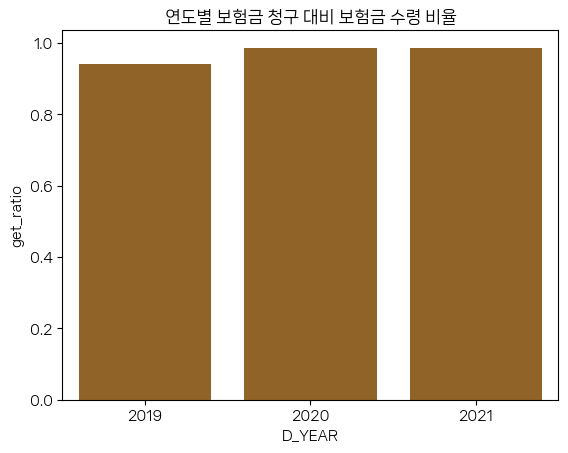

In [ ]:
# 시각화
sns.barplot(
    data=claim_get_ratio,
    x = "D_YEAR",
    y="get_ratio"
)
plt.title("연도별 보험금 청구 대비 보험금 수령 비율")
plt.show()

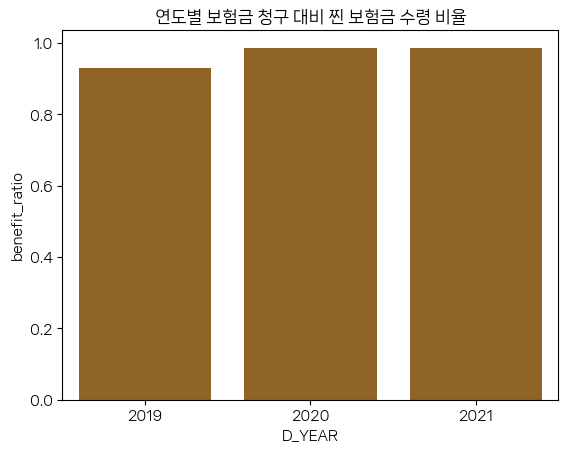

In [ ]:
# 찐 수령 건수(수령액이 기록된 건수) 비율

sns.barplot(
    data=claim_get_ratio,
    x = "D_YEAR",
    y="benefit_ratio"
)
plt.title("연도별 보험금 청구 대비 찐 보험금 수령 비율")
plt.show()

## 보험 청구인 vs 미청구인

In [ ]:
# 데이터 복제
phi_claim = phi_only.copy()

### 보험 청구 여부 별 보험 종류

In [ ]:
phi_claim.groupby(["PHI_CLAIM_YN","PHI_N"])[["PHI_N"]].count()

PHI_N
PHI_CLAIM_YN  PHI_N                
-9.0000000000 101.0000000000    128
              102.0000000000    102
              103.0000000000     63
              104.0000000000     56
              105.0000000000     18
...                             ...
2.0000000000  410.0000000000     10
              411.0000000000      7
              412.0000000000      5
              413.0000000000      4
              414.0000000000      1

[200 rows x 1 columns]

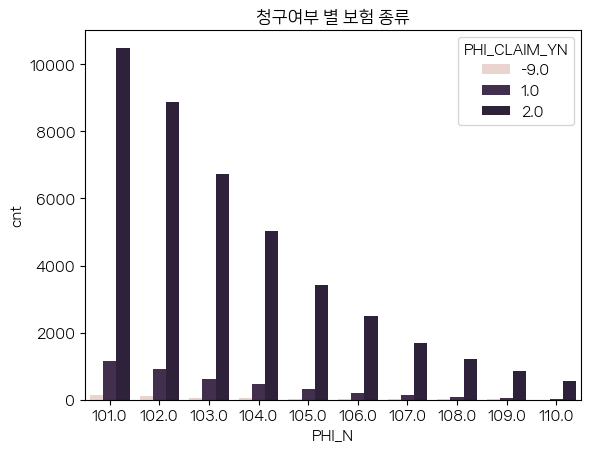

In [ ]:
# 청구여부 별 보험종류 count
phi_claim_phi_n = phi_claim.groupby(["PHI_CLAIM_YN","PHI_N"])["PHI_N"].size().reset_index(name="cnt")
phi_claim_phi_n_top10 = phi_claim_phi_n.groupby("PHI_CLAIM_YN").head(10)

sns.barplot(
    data = phi_claim_phi_n_top10,
    x = "PHI_N",
    y = "cnt",
    hue = "PHI_CLAIM_YN"
)
plt.title("청구여부 별 보험 종류")
plt.show()

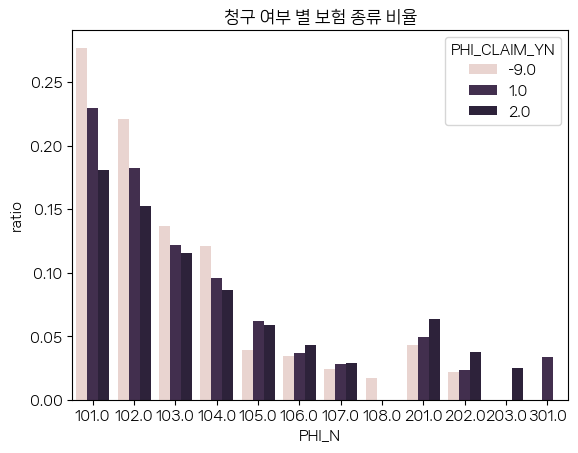

In [ ]:
# 청구여부별 보험종류 비율

# 청구여부별 count 값 구하기
yn_cnt = phi_claim_phi_n.groupby("PHI_CLAIM_YN")["cnt"].sum("cnt").to_frame("yn_cnt")

# 데이터 병합
cnt_df = pd.merge(yn_cnt, phi_claim_phi_n, on="PHI_CLAIM_YN")

# 비율 계산
cnt_df["ratio"] = cnt_df["cnt"] / cnt_df["yn_cnt"]

# 보험 종류 별 보험종류비율 top10
cnt_df_top10 = cnt_df.sort_values(by="ratio", ascending=False).groupby("PHI_CLAIM_YN").head(10)

# 시각화
sns.barplot(
    data = cnt_df_top10,
    x = "PHI_N",
    y = "ratio",
    hue = "PHI_CLAIM_YN"
)
plt.title("청구 여부 별 보험 종류 비율")
plt.show()

In [ ]:
# 비율값 확인
cnt_df_top10.sort_values(by=["PHI_CLAIM_YN", "ratio"], ascending=[True, False])[["PHI_CLAIM_YN","PHI_N","ratio"]]

,PHI_CLAIM_YN,PHI_N,ratio
0,-9.0000000000,101.0000000000,0.2770562771
1,-9.0000000000,102.0000000000,0.2207792208
2,-9.0000000000,103.0000000000,0.1363636364
3,-9.0000000000,104.0000000000,0.1212121212
13,-9.0000000000,201.0000000000,0.0432900433
4,-9.0000000000,105.0000000000,0.0389610390
5,-9.0000000000,106.0000000000,0.0346320346
6,-9.0000000000,107.0000000000,0.0238095238
14,-9.0000000000,202.0000000000,0.0216450216
7,-9.0000000000,108.0000000000,0.0173160173
